In [1]:
#Import Package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

In [2]:
#Loading Each Social Media Dataset
#Ensure You Put This File With Your Excels/CSVs... In One Folder
#Change the forms' names to yours and then just need to run the program!
df_twitter = pd.read_excel("twitter1.xlsx")
df_ig = pd.read_excel("instagram1.xlsx")
df_linkedin = pd.read_excel("linkedin1.xlsx")
df_fb = pd.read_excel("facebook1.xlsx")
#Substring
def substr(n):
    for df in [df_twitter, df_ig, df_linkedin, df_fb]:
        df['Post Name'] = df['Post Name'].str[:n] + '...'
substr(55)#Can change the sub len

In [3]:
#Preview
print(df_ig.head())
print(df_linkedin.head())
print(df_fb.head())
print(df_twitter.head())

       Dates                                          Post Name  \
0 2024-01-21  Celebrating Milestones! Our Bright Horizons Ac...   
1 2024-01-22  Are you passionate for STEM? Start with NSTEM!...   
2 2024-01-22  Congratulations to our new Chapter! Welcome to...   
3 2024-01-23  Celebrating a milestone achievement! Congratul...   
4 2024-01-23  Empower middle-school minds with STEM exciteme...   

   Follower Reach  Non-Follower Reach  Impressions: Profile  \
0              96                   2                   5.0   
1              60                   3                   NaN   
2              88                   4                   5.0   
3              77                   2                   3.0   
4              78                   3                   5.0   

   Impressions: Other  Impressions: Home  Impressions: Explore/Hashtags  \
0                 1.0              101.0                            0.0   
1                 NaN                NaN                            

In [4]:
#Data Visualization: Side-by-side Barplot

In [5]:
#Facebook:
def fb_plot(df,
            width_=0.15,#Bar width
            figsize1=20,#Figure width
            figsize2=20,#Figure height
            xfont=40,#Xlabel fontsize
            yfont=40,#Ylabel fontsize
            titlefont=40,#Whole title fontsize
            labelfont=20,#Label fontsize
            legend_1font=20,#Internal legend fontsize
            comlegend=30,#External legend fontsize
            textfont=20,#Text after bar: fontsize
            legtitle=30#Legend title font size
            ):#When running functions, lease adjust parameters if you want
    
    #Below list all the columns of interest to display in graph
    reach = df["Reach"]
    engage = df["Engagements"]
    click = df["Post clicks"]
    reaction = df["Reactions"]
    share = df["Shares"]
    comment = df["Comments"]
    
    #Construction of plots
    #Preset
    n = df.shape[0]#Number of rows (posts)
    ind = np.arange(n)
    width = width_
    #Initialization
    fig, ax = plt.subplots(figsize=(figsize1, figsize2))#Use subplots to get the axis object
    #Draw side-by-side barplots and store the returned objects
    bars_reach = ax.barh(ind, reach, height=width, label='Reach')#Notice here I use ax.barh to do the plotting
    bars_engage = ax.barh(ind + width, engage, height=width, label='Engagements')
    bars_click = ax.barh(ind + width * 2, click, height=width, label='Clicks')
    bars_reaction = ax.barh(ind + width * 3, reaction, height=width, label='Reactions')
    bars_share = ax.barh(ind + width * 4, share, height=width, label='Shares')
    bars_comment = ax.barh(ind + width * 5, comment, height=width, label='Comments')
    #Set labels & title & ticks
    ax.set_xlabel('Count',fontsize=xfont)#Label X-axis, notice here I use ax.set to do the setting
    ax.set_ylabel('Posts',fontsize=yfont)#Label Y-axis
    ax.set_title('Facebook Post Analytics',fontsize=titlefont)#Set title
    ax.set_yticks(ind + width * 2.5)#Label each row in the plot, add ticks
    ax.set_yticklabels(df["Post Name"],fontsize=labelfont)#Set y-tick labels
    #Add the exact value to the right of each bar
    for bars in [bars_reach, bars_engage, bars_click, bars_reaction, bars_share, bars_comment]:
        for bar in bars:
            value = bar.get_width()#Get bar's width
            ax.text(value, bar.get_y() + bar.get_height()/2,#Annotating location
                    f'{value}',#Text
                    va='center', ha='left', fontsize=textfont)#Ax.text to annotate
    #Set legends
    #First legend
    handles, labels = ax.get_legend_handles_labels()
    first_legend = ax.legend(handles, labels, loc="best", title="Metrics", fontsize=legend_1font)
    ax.add_artist(first_legend)
    #Second legend
    #Create legend's content by looping
    engagement_rate_labels = [f"{name}: {count}" for name, count in zip(df["Post Name"], df["Engagement rate"])]
    engagement_rate_handles = [Patch(label=label) for label in engagement_rate_labels]
    ax.legend(handles=engagement_rate_handles, title="Engagement Rate",
              fontsize=comlegend, bbox_to_anchor=(1.05, 1), loc="upper left", title_fontsize=legtitle)#Bbox: expel legend outside
    
    #Show
    plt.show()

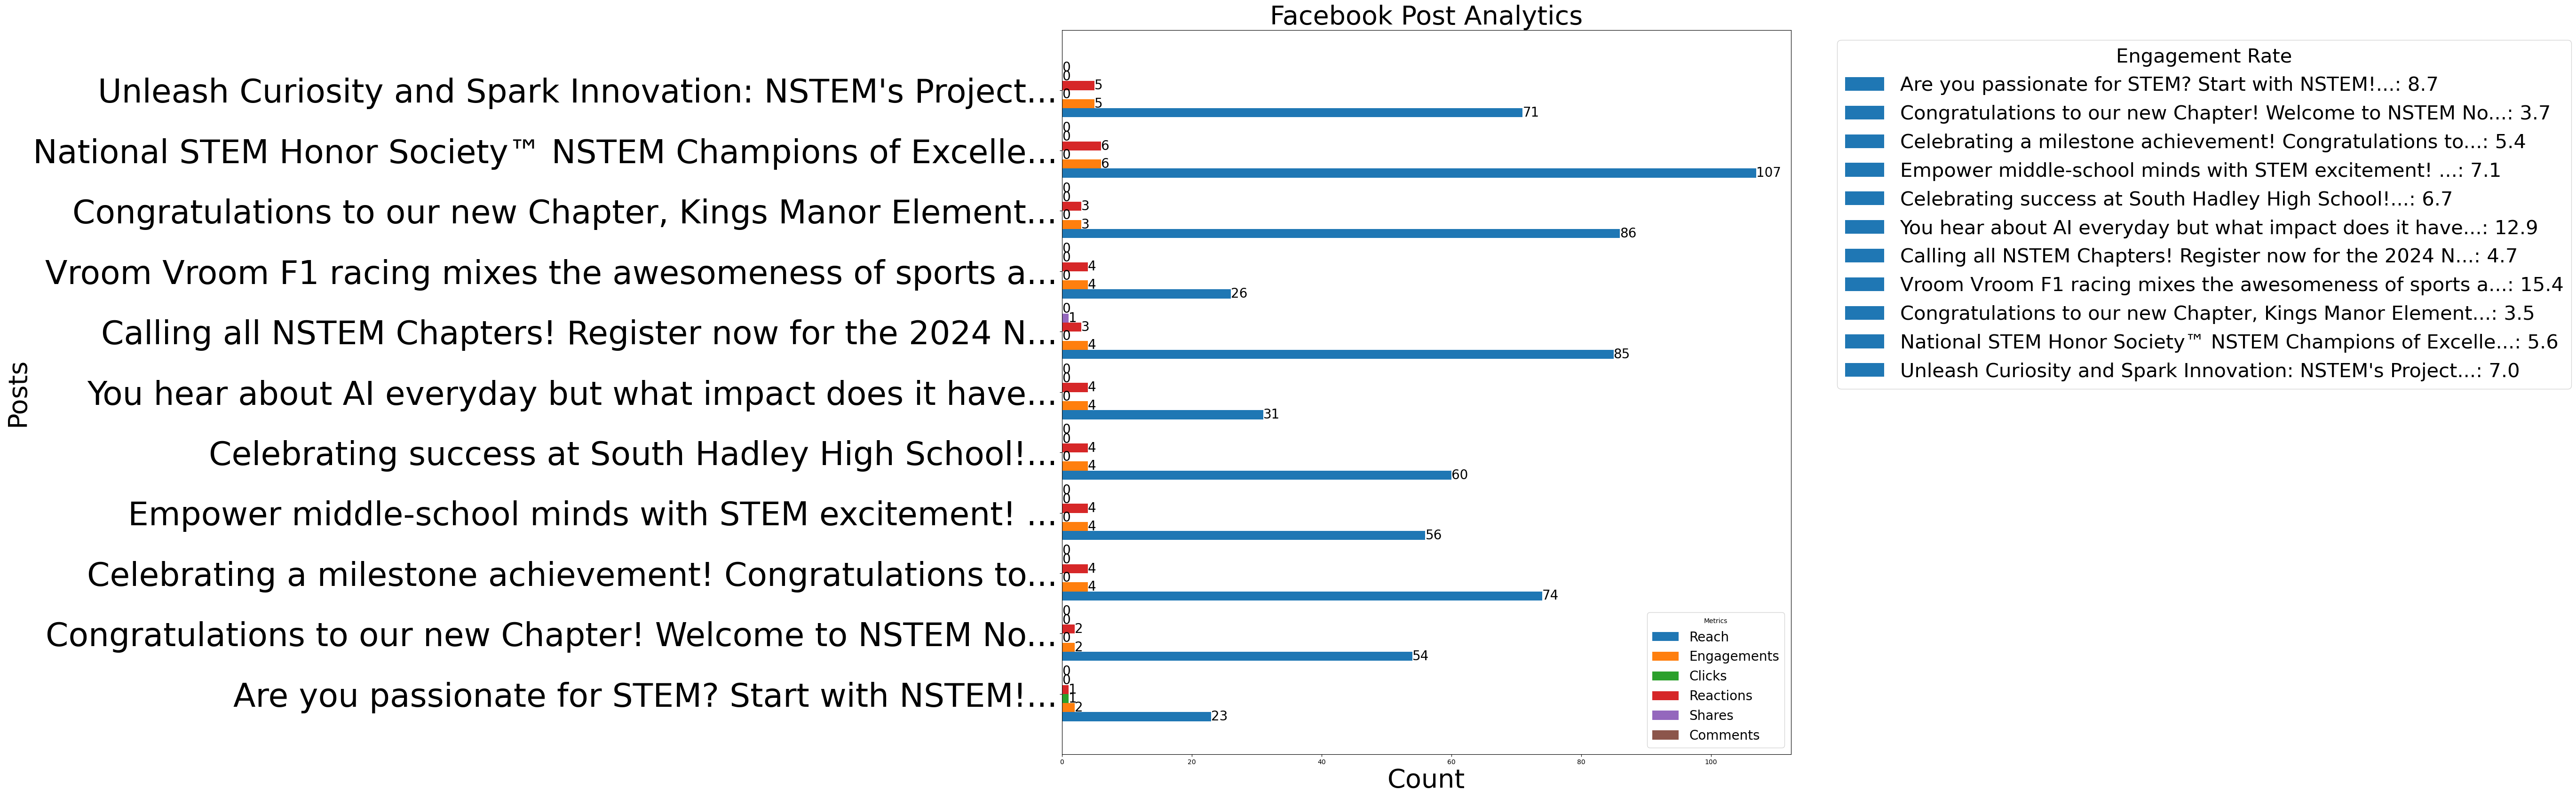

In [6]:
fb_plot(df=df_fb, labelfont=50,legtitle=30)

In [7]:
#Twitter:
def X_plot(df,
           width_=0.15,#Bar width
           figsize1=20,#Figure width
           figsize2=20,#Figure height
           xfont=40,#Xlabel fontsize
           yfont=40,#Ylabel fontsize
           titlefont=20,#Whole title fontsize
           labelfont=20,#Label fontsize
           legend_1font=30,#Internal legend fontsize
           textfont=20#Text after bar: fontsize
           ):#When running functions, lease adjust parameters if you want
    
    #Below list all the columns of interest to display in graph
    impre = df["Impressions"]
    new_fo = df["New Followers"]
    engagement = df["Engagement"]
    replies = df["Replies"]
    likes = df["Likes"]
    visit = df["Profile Visits"]
    
    #Construction of plots
    #Preset
    n = df.shape[0]#Number of rows (posts)
    ind = np.arange(n)
    width = width_
    #Intialization
    fig, ax = plt.subplots(figsize=(figsize1, figsize2))#Adjust figure size as needed
    #Draw side-by-side barplots and store the returned objects
    bars_impre = ax.barh(ind, impre, height=width, label='Impressions')
    bars_new_fo = ax.barh(ind + width, new_fo, height=width, label='New Followers')
    bars_engagement = ax.barh(ind + width * 2, engagement, height=width, label='Engagement')
    bars_replies = ax.barh(ind + width * 3, replies, height=width, label='Replies')
    bars_likes = ax.barh(ind + width * 4, likes, height=width, label='Likes')
    bars_visit = ax.barh(ind + width * 5, visit, height=width, label='Profile Visits')
    #Add the exact value to the right of each bar
    for bars in [bars_impre, bars_new_fo, bars_engagement, bars_replies, bars_likes, bars_visit]:
        for bar in bars:
            value = bar.get_width()
            ax.text(value, bar.get_y() + bar.get_height() / 2, f'{value}', va='center', ha='left', fontsize=textfont)
    #Set labels & title & ticks
    ax.set_xlabel('Count',fontsize=xfont)
    ax.set_ylabel('Posts',fontsize=yfont)
    ax.set_title('Twitter Post Analytics',fontsize=titlefont)
    ax.set_yticks(ind + width * 2.5, df["Post Name"],fontsize=labelfont)
    #Set legend
    #Just one legend here
    handles, labels = ax.get_legend_handles_labels()
    first_legend = ax.legend(handles, labels, loc="best", title="Metrics", fontsize=legend_1font)
    ax.add_artist(first_legend)
    
    #Show
    plt.show()

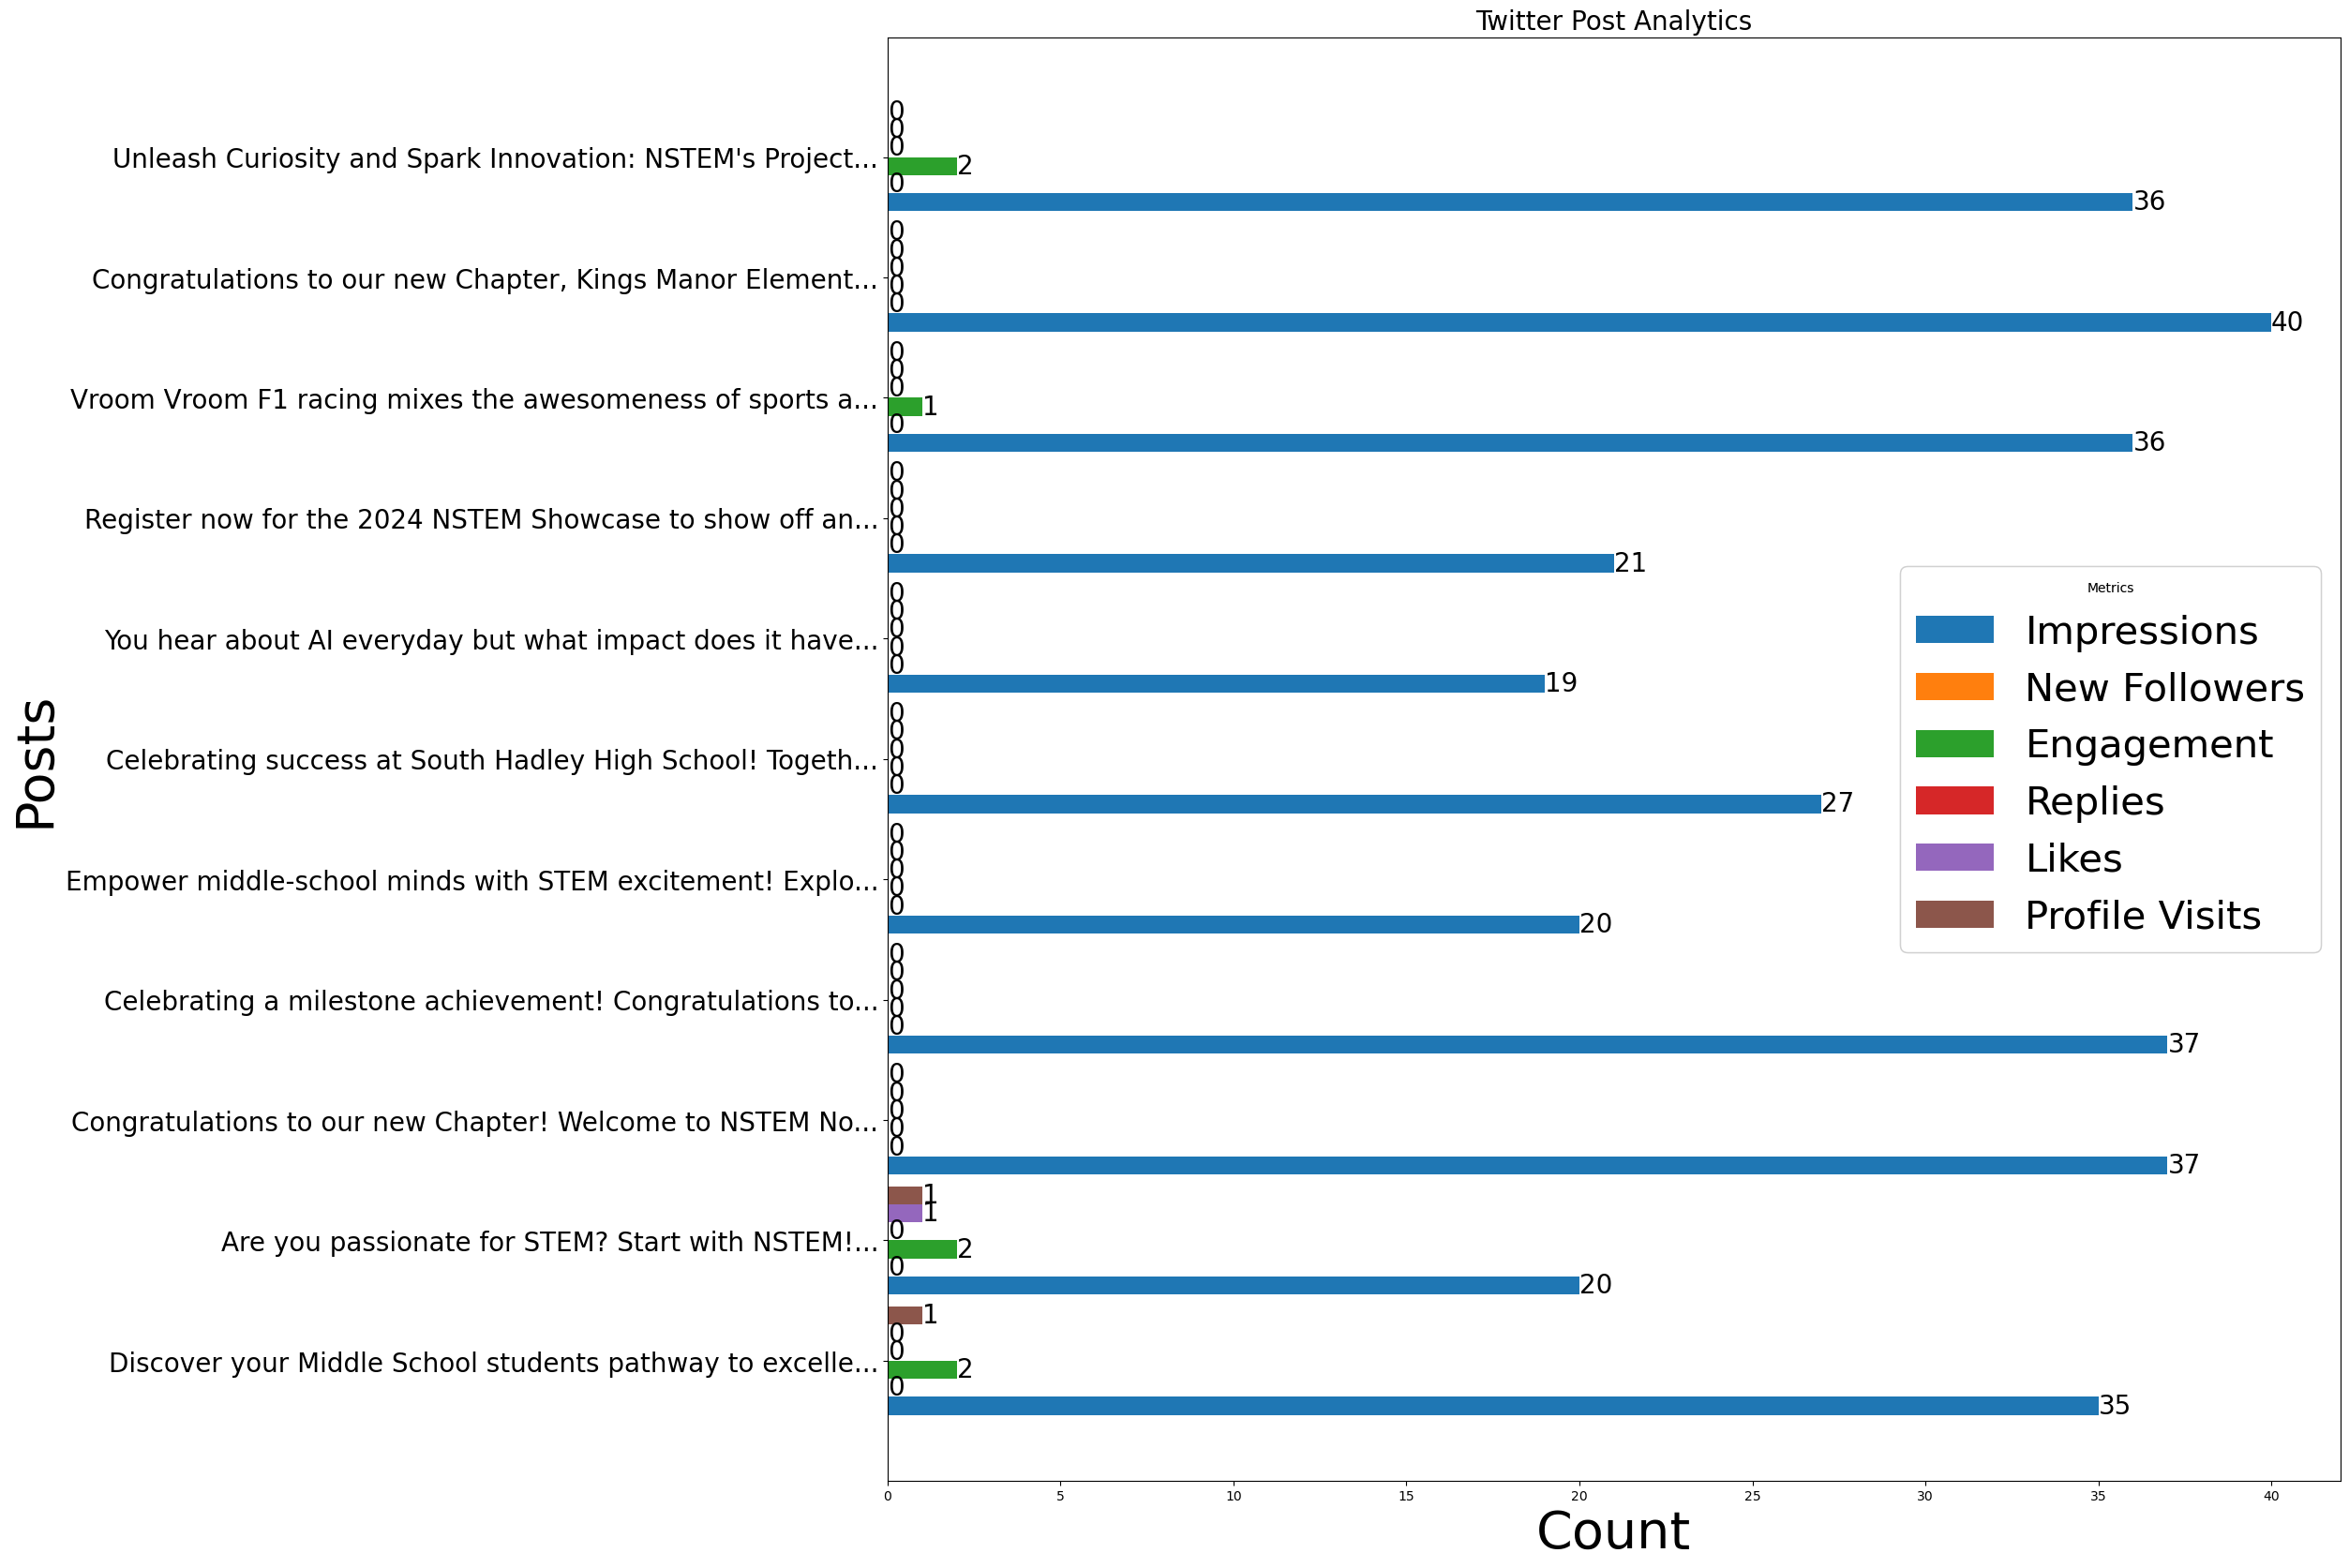

In [8]:
X_plot(df_twitter)

In [9]:
#LinkedIn:
def In_plot(df,
            width_=0.15,#Bar width
            figsize1=40,#Figure width
            figsize2=40,#Figure height
            xfont=40,#Xlabel fontsize
            yfont=40,#Ylabel fontsize
            titlefont=40,#Whole title fontsize
            labelfont=40,#Label fontsize
            legend_1font=20,#Internal legend fontsize
            comlegend=30,#External legend fontsize
            textfont=20,#Text after bar: fontsize
            legtitle=30#Legend title font size
            ):#When running functions, lease adjust parameters if you want
    
    #Below list all the columns of interest to display in graph
    impre = df["Impressions"]
    unik_impre = df["Unique Impressions"]
    engagement = df["Engagements"]
    clicks = df["Clicks"]
    reactions = df["Reactions"]
    comments = df["Comments"]
    share = df["Reposts"]
    
    #Construction of plots
    #Preset
    n = df.shape[0]
    ind = np.arange(n)
    width = width_
    #Initialization
    fig, ax = plt.subplots(figsize=(figsize1, figsize2))#Adjust the figure size as needed
    #Draw side-by-side barplots and store the returned objects
    bars_impre = ax.barh(ind, impre, height=width, label='Impressions')
    bars_unik_impre = ax.barh(ind + width, unik_impre, height=width, label='Unique Impressions')
    bars_engagement = ax.barh(ind + width * 2, engagement, height=width, label='Engagement')
    bars_clicks = ax.barh(ind + width * 3, clicks, height=width, label='Clicks')
    bars_reactions = ax.barh(ind + width * 4, reactions, height=width, label='Reactions')
    bars_comments = ax.barh(ind + width * 5, comments, height=width, label='Comments')
    bars_share = ax.barh(ind + width * 6, share, height=width, label='Reposts')
    #Annotate each bar with its value
    for bars in [bars_impre, bars_unik_impre, bars_engagement, bars_clicks, bars_reactions, bars_comments, bars_share]:
        for bar in bars:
            value = bar.get_width()
            ax.text(value, bar.get_y() + bar.get_height() / 2, f'{value}', va='center', ha='left', fontsize=textfont)
    #Set labels & title & ticks
    ax.set_xlabel('Count',fontsize=xfont)
    ax.set_ylabel('Posts',fontsize=yfont)
    ax.set_title('LinkedIn Post Analytics',fontsize=titlefont)
    ax.set_yticks(ind + width * 3.5, df["Post Name"],fontsize=labelfont)#Adjust y-tick labels
    #Set legends
    #First legend for metrics
    handles, labels = ax.get_legend_handles_labels()
    first_legend = ax.legend(handles, labels, loc='best', title="Metrics", fontsize=legend_1font)
    ax.add_artist(first_legend)
    #Combined legend for engagement rate and click-through rate per post
    combined_rate_handles = [
        #Legend's content
        Patch(label=f"""{row['Post Name']}: 
              Eng. Rate: {row['Engagement Rate']}; 
              CTR: {row['Click-through rate']}""")
        for _, row in df.iterrows()
    ]
    ax.legend(handles=combined_rate_handles, title="Engagement & Click-through Rates",
                                fontsize=comlegend, loc='upper left', bbox_to_anchor=(1, 1.05), title_fontsize=legtitle)
    
    #Show
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


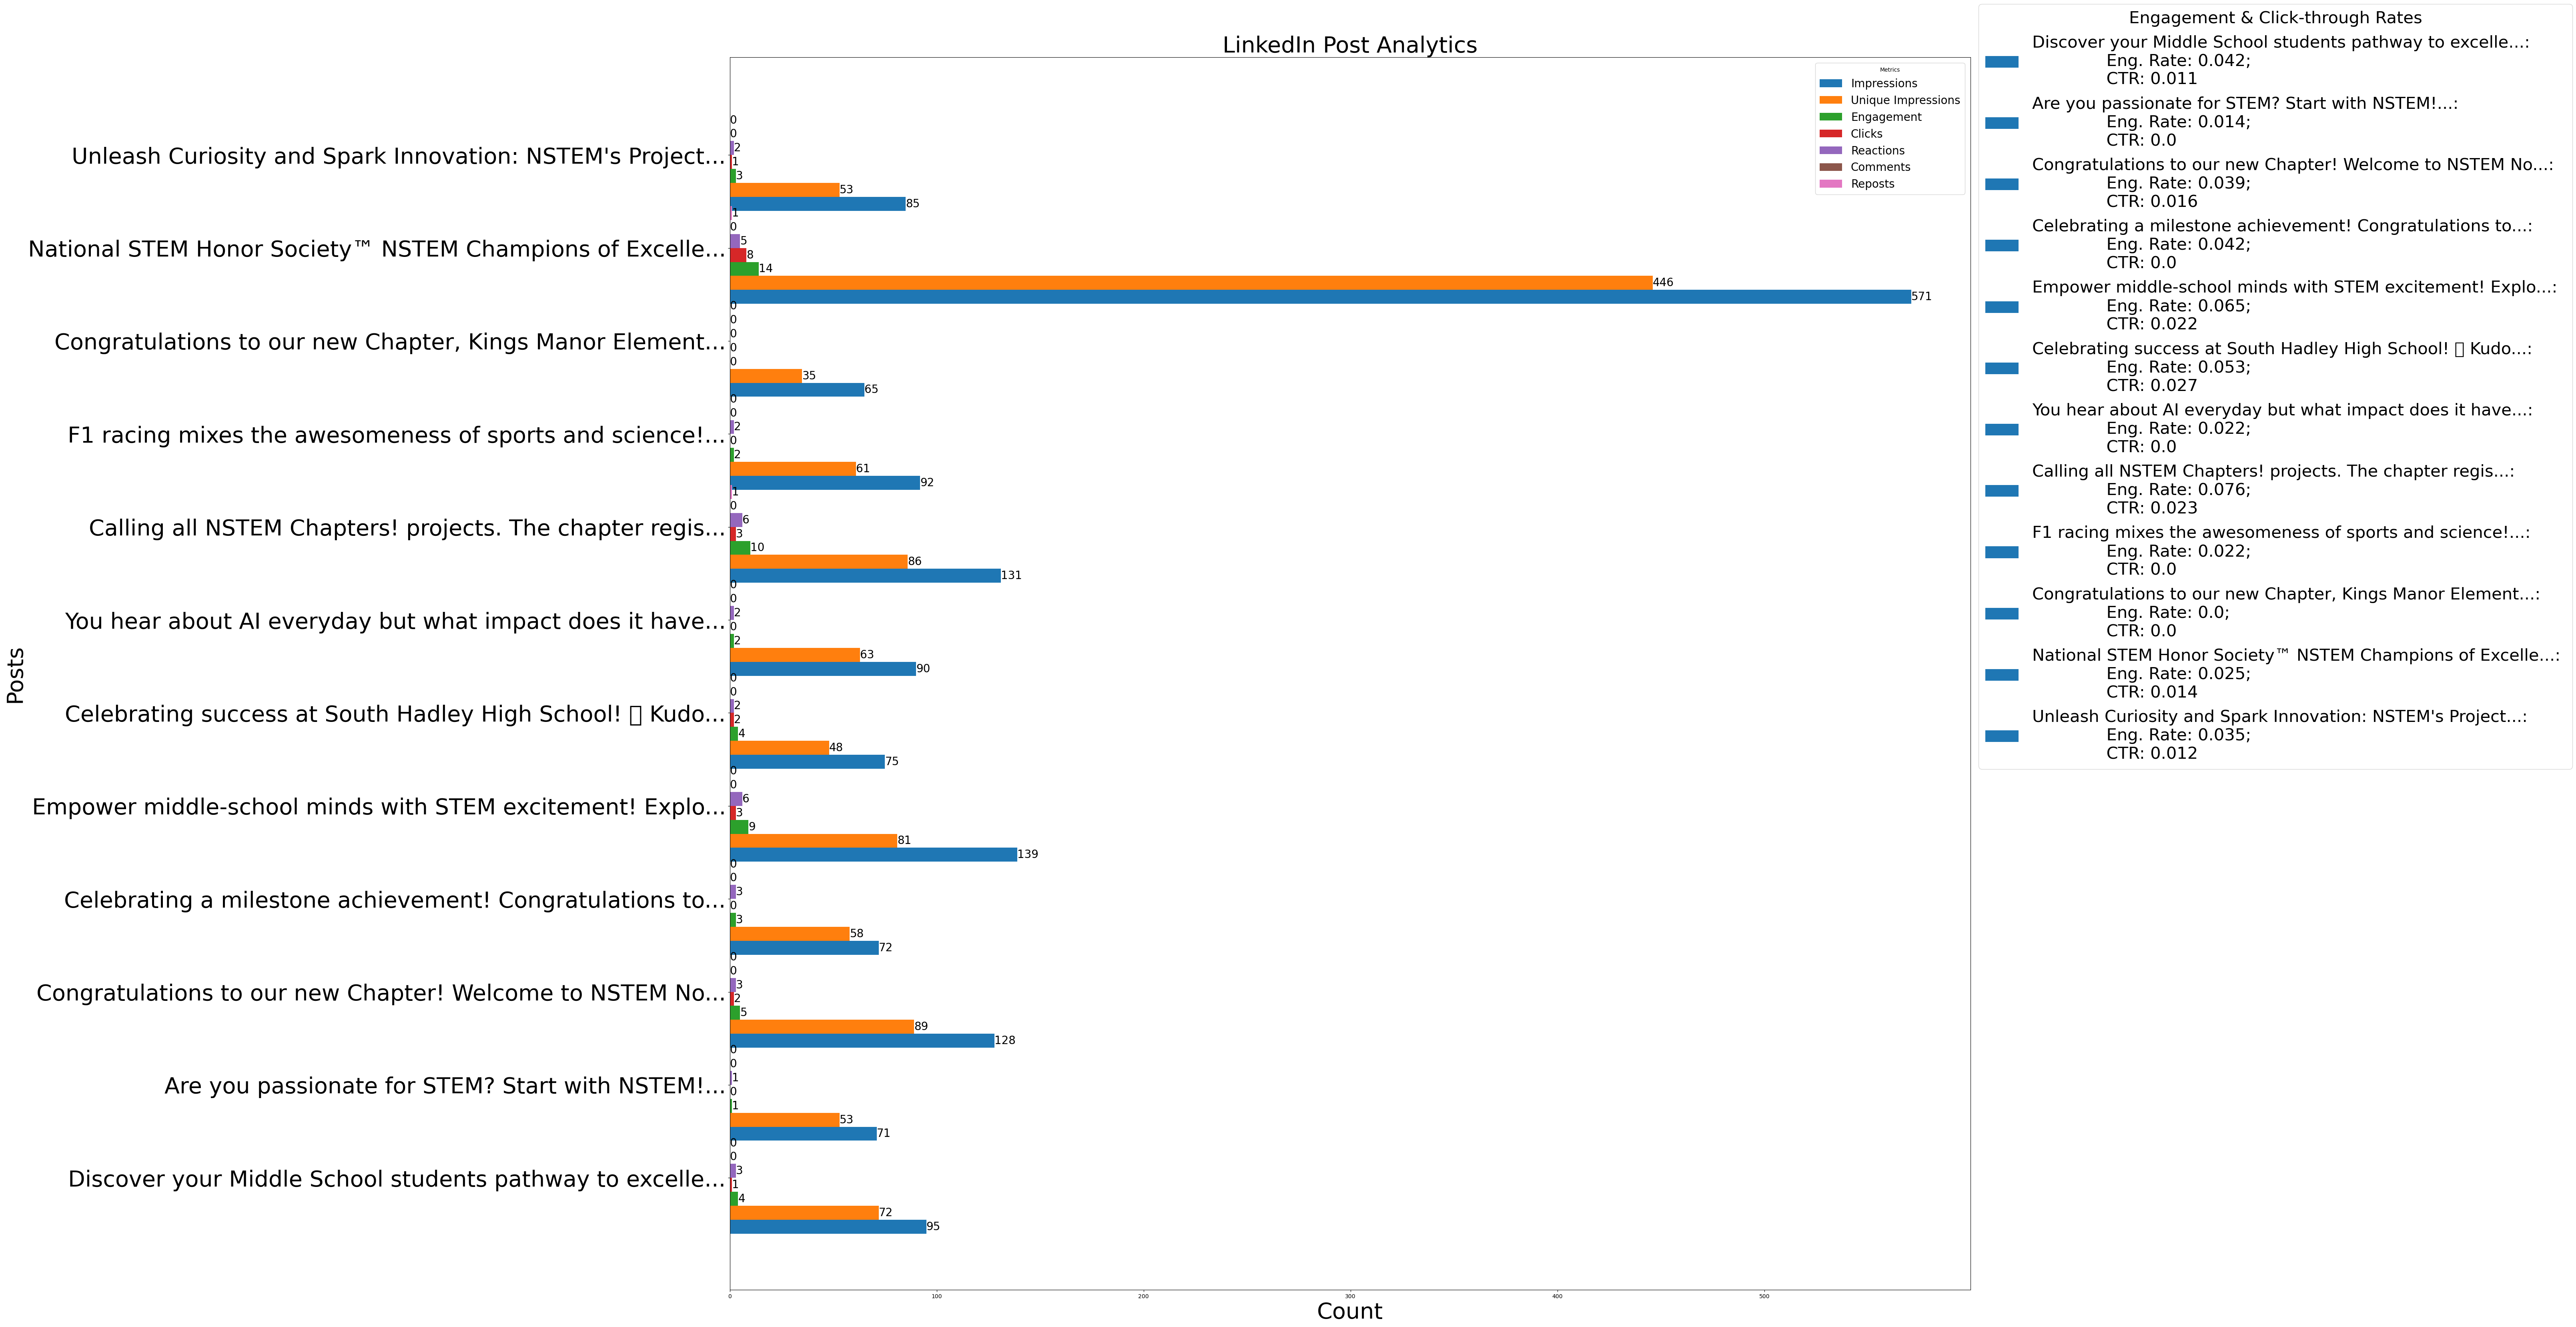

In [10]:
In_plot(df_linkedin)

In [11]:
#IG(photo)
def IG_plot_photo(df,
                  width_=0.08,#Bar width
                  figsize1=40,#Figure width
                  figsize2=40,#Figure height
                  xfont=40,#Xlabel fontsize
                  yfont=40,#Ylabel fontsize
                  titlefont=40,#Whole title fontsize
                  labelfont=40,#Label fontsize
                  legend_1font=20,#Internal legend fontsize
                  textfont=20#Text after bar: fontsize
                 ):#When running functions, lease adjust parameters if you want
    
    #Below list all the columns of interest to display in graph
    metrics = ["Follower Reach", "Non-Follower Reach", "Impressions: Profile", 
               "Impressions: Other", "Impressions: Home", "Impressions: Explore/Hashtags", 
               "Interactions", "Likes", "Comments", "Shares", "Saves", 
               "Profile Visits", "Follows", "Call Button Taps", "Email Button Taps"]
    
    #Construction of plots
    #Preset
    n = df.shape[0]
    ind = np.arange(n)
    width = width_#Adjust width for the number of variables (too many metrics here)
    #Initialization
    fig, ax = plt.subplots(figsize=(figsize1, figsize2))#Adjust the figure size as needed
    #Create bar plots for each metric
    for i, metric in enumerate(metrics):#Enumerate will loop index & value
        values = df[metric]
        bars = ax.barh(ind + width * i, values, height=width, label=metric)
        #Annotate each bar with its value
        for bar in bars:
            value = bar.get_width()
            ax.text(value, bar.get_y() + bar.get_height() / 2, f'{value}', va='center', ha='left', fontsize=textfont)
    #Set labels & title & ticks
    ax.set_xlabel('Count',fontsize=xfont)
    ax.set_ylabel('Posts',fontsize=yfont)
    ax.set_title('Instagram Post Analytics: Photos',fontsize=titlefont)
    ax.set_yticks(ind + width * (len(metrics) / 2), df["Post Name"], fontsize=labelfont)#enter y-ticks
    #Add legend
    ax.legend(loc='best', title="Metrics", fontsize=legend_1font)
    
    #Show
    plt.show()

In [12]:
#IG(reel)
def IG_plot_reel(df,
                 width_=0.08,#Bar width
                 figsize1=40,#Figure width
                 figsize2=40,#Figure height
                 xfont=40,#Xlabel fontsize
                 yfont=40,#Ylabel fontsize
                 titlefont=40,#Whole title fontsize
                 labelfont=40,#Label fontsize
                 legend_1font=20,#Internal legend fontsize
                 comlegend=30,#External legend fontsize
                 textfont=20,#Text after bar: fontsize
                 legtitle=30#Legend title font size
                 ):#When running functions, lease adjust parameters if you want
    
    #Below list all the columns of interest to display in graph
    metrics = ["Follower Reach", "Non-Follower Reach", 
               "Interactions", "Likes", "Comments", "Shares", "Saves"]
    
    #Construction of plots
    #Preset
    n = df.shape[0]
    ind = np.arange(n)
    width = width_#Adjust width for the number of variables (too many metrics here)
    #Initialization
    fig, ax = plt.subplots(figsize=(figsize1, figsize2))#Adjust the figure size as needed
    #Create bar plots for each metric
    for i, metric in enumerate(metrics):#Enumerate will loop index & value
        values = df[metric]
        bars = ax.barh(ind + width * i, values, height=width, label=metric)
        #Annotate each bar with its value
        for bar in bars:
            value = bar.get_width()
            ax.text(value, bar.get_y() + bar.get_height() / 2, f'{value}', va='center', ha='left',fontsize=textfont)
    #Set labels & title & ticks
    ax.set_xlabel('Count',fontsize=xfont)
    ax.set_ylabel('Posts',fontsize=yfont)
    ax.set_title('Instagram Post Analytics: Reels', fontsize=titlefont)
    ax.set_yticks(ind + width * (len(metrics) / 2), df["Post Name"], fontsize=labelfont)#enter y-ticks
    #Set legends
    #First legend for metrics
    handles, labels = ax.get_legend_handles_labels()
    first_legend = ax.legend(handles, labels, loc='best', title="Metrics", fontsize=legend_1font)
    ax.add_artist(first_legend)
    #Combined legend for engagement rate and click-through rate per post
    combined_rate_handles = [
        #Legend's content
        Patch(label=f"""{row['Post Name']}: 
              Watch Time: {row['Watch Time']}; 
              Avg. Watch Time: {row['Avg Watch Time']}""")
        for _, row in df.iterrows()
    ]
    ax.legend(handles=combined_rate_handles, title="Watch Time & Avg. Watch Time",
                                fontsize=comlegend, loc='upper left', bbox_to_anchor=(1, 1.05), title_fontsize=legtitle)
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


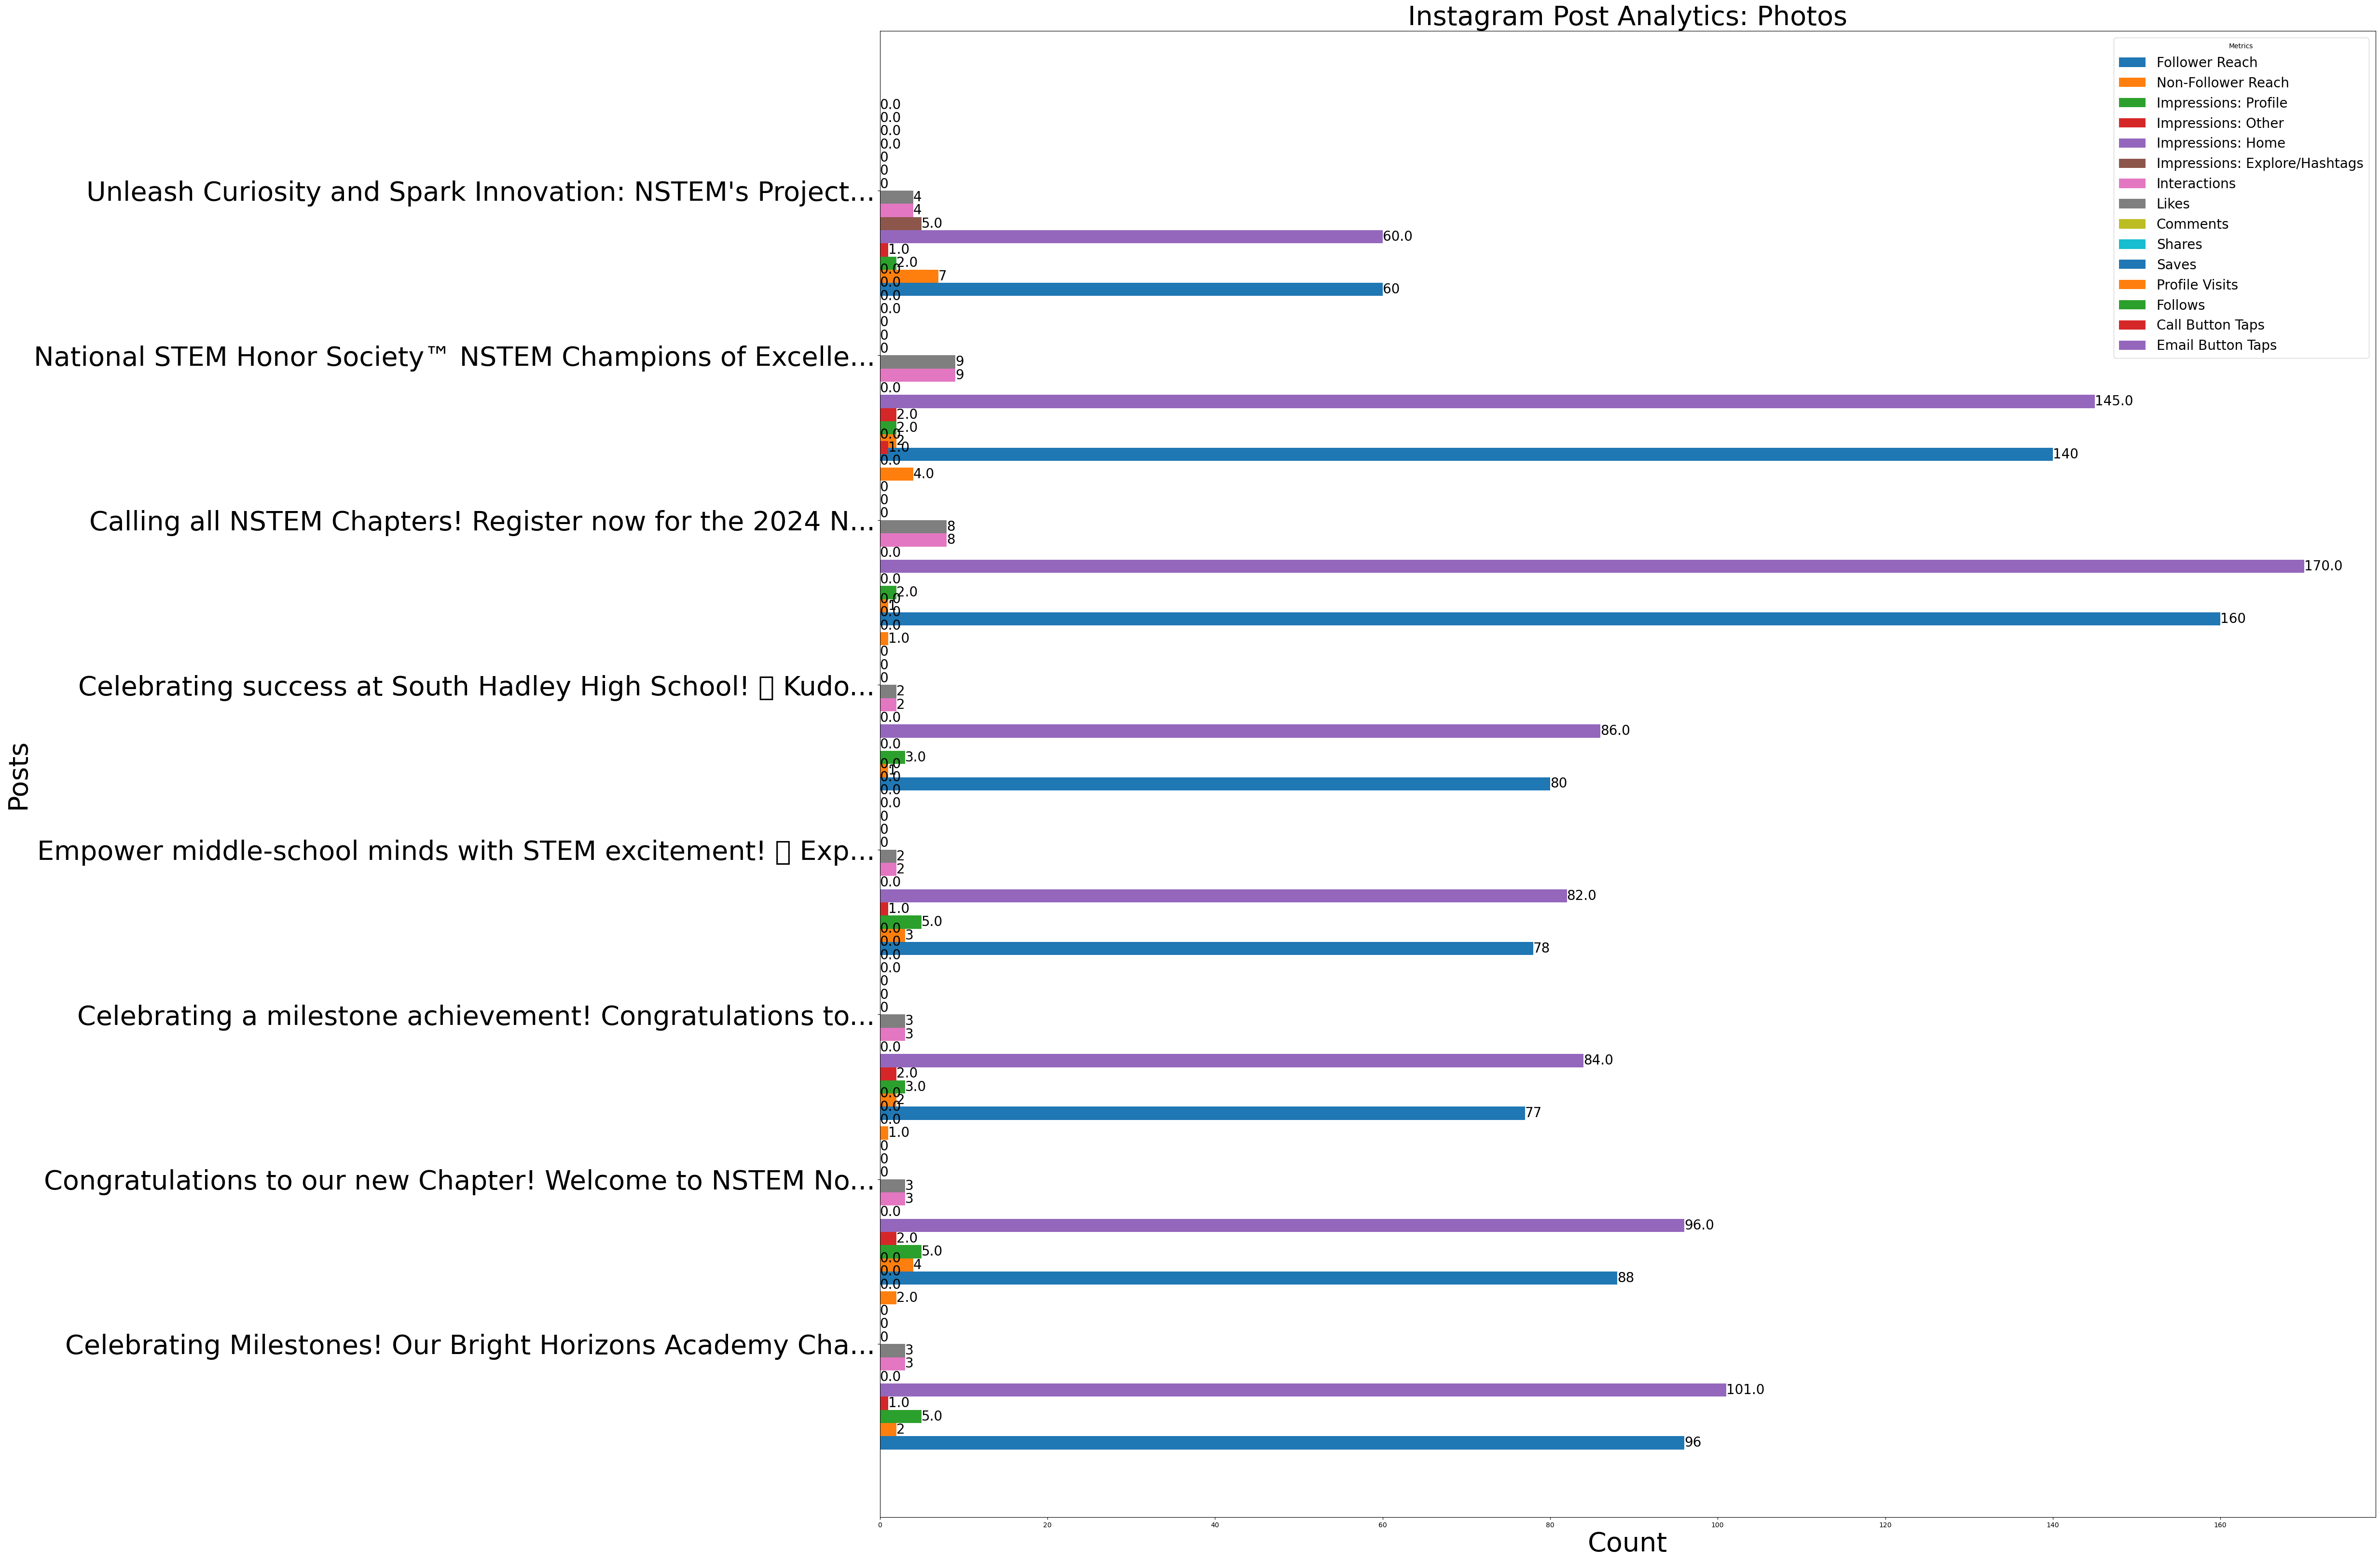

In [13]:
IG_plot_photo(df = df_ig.loc[df_ig["""Media Type (Video or Photo)"""]=="photo",])

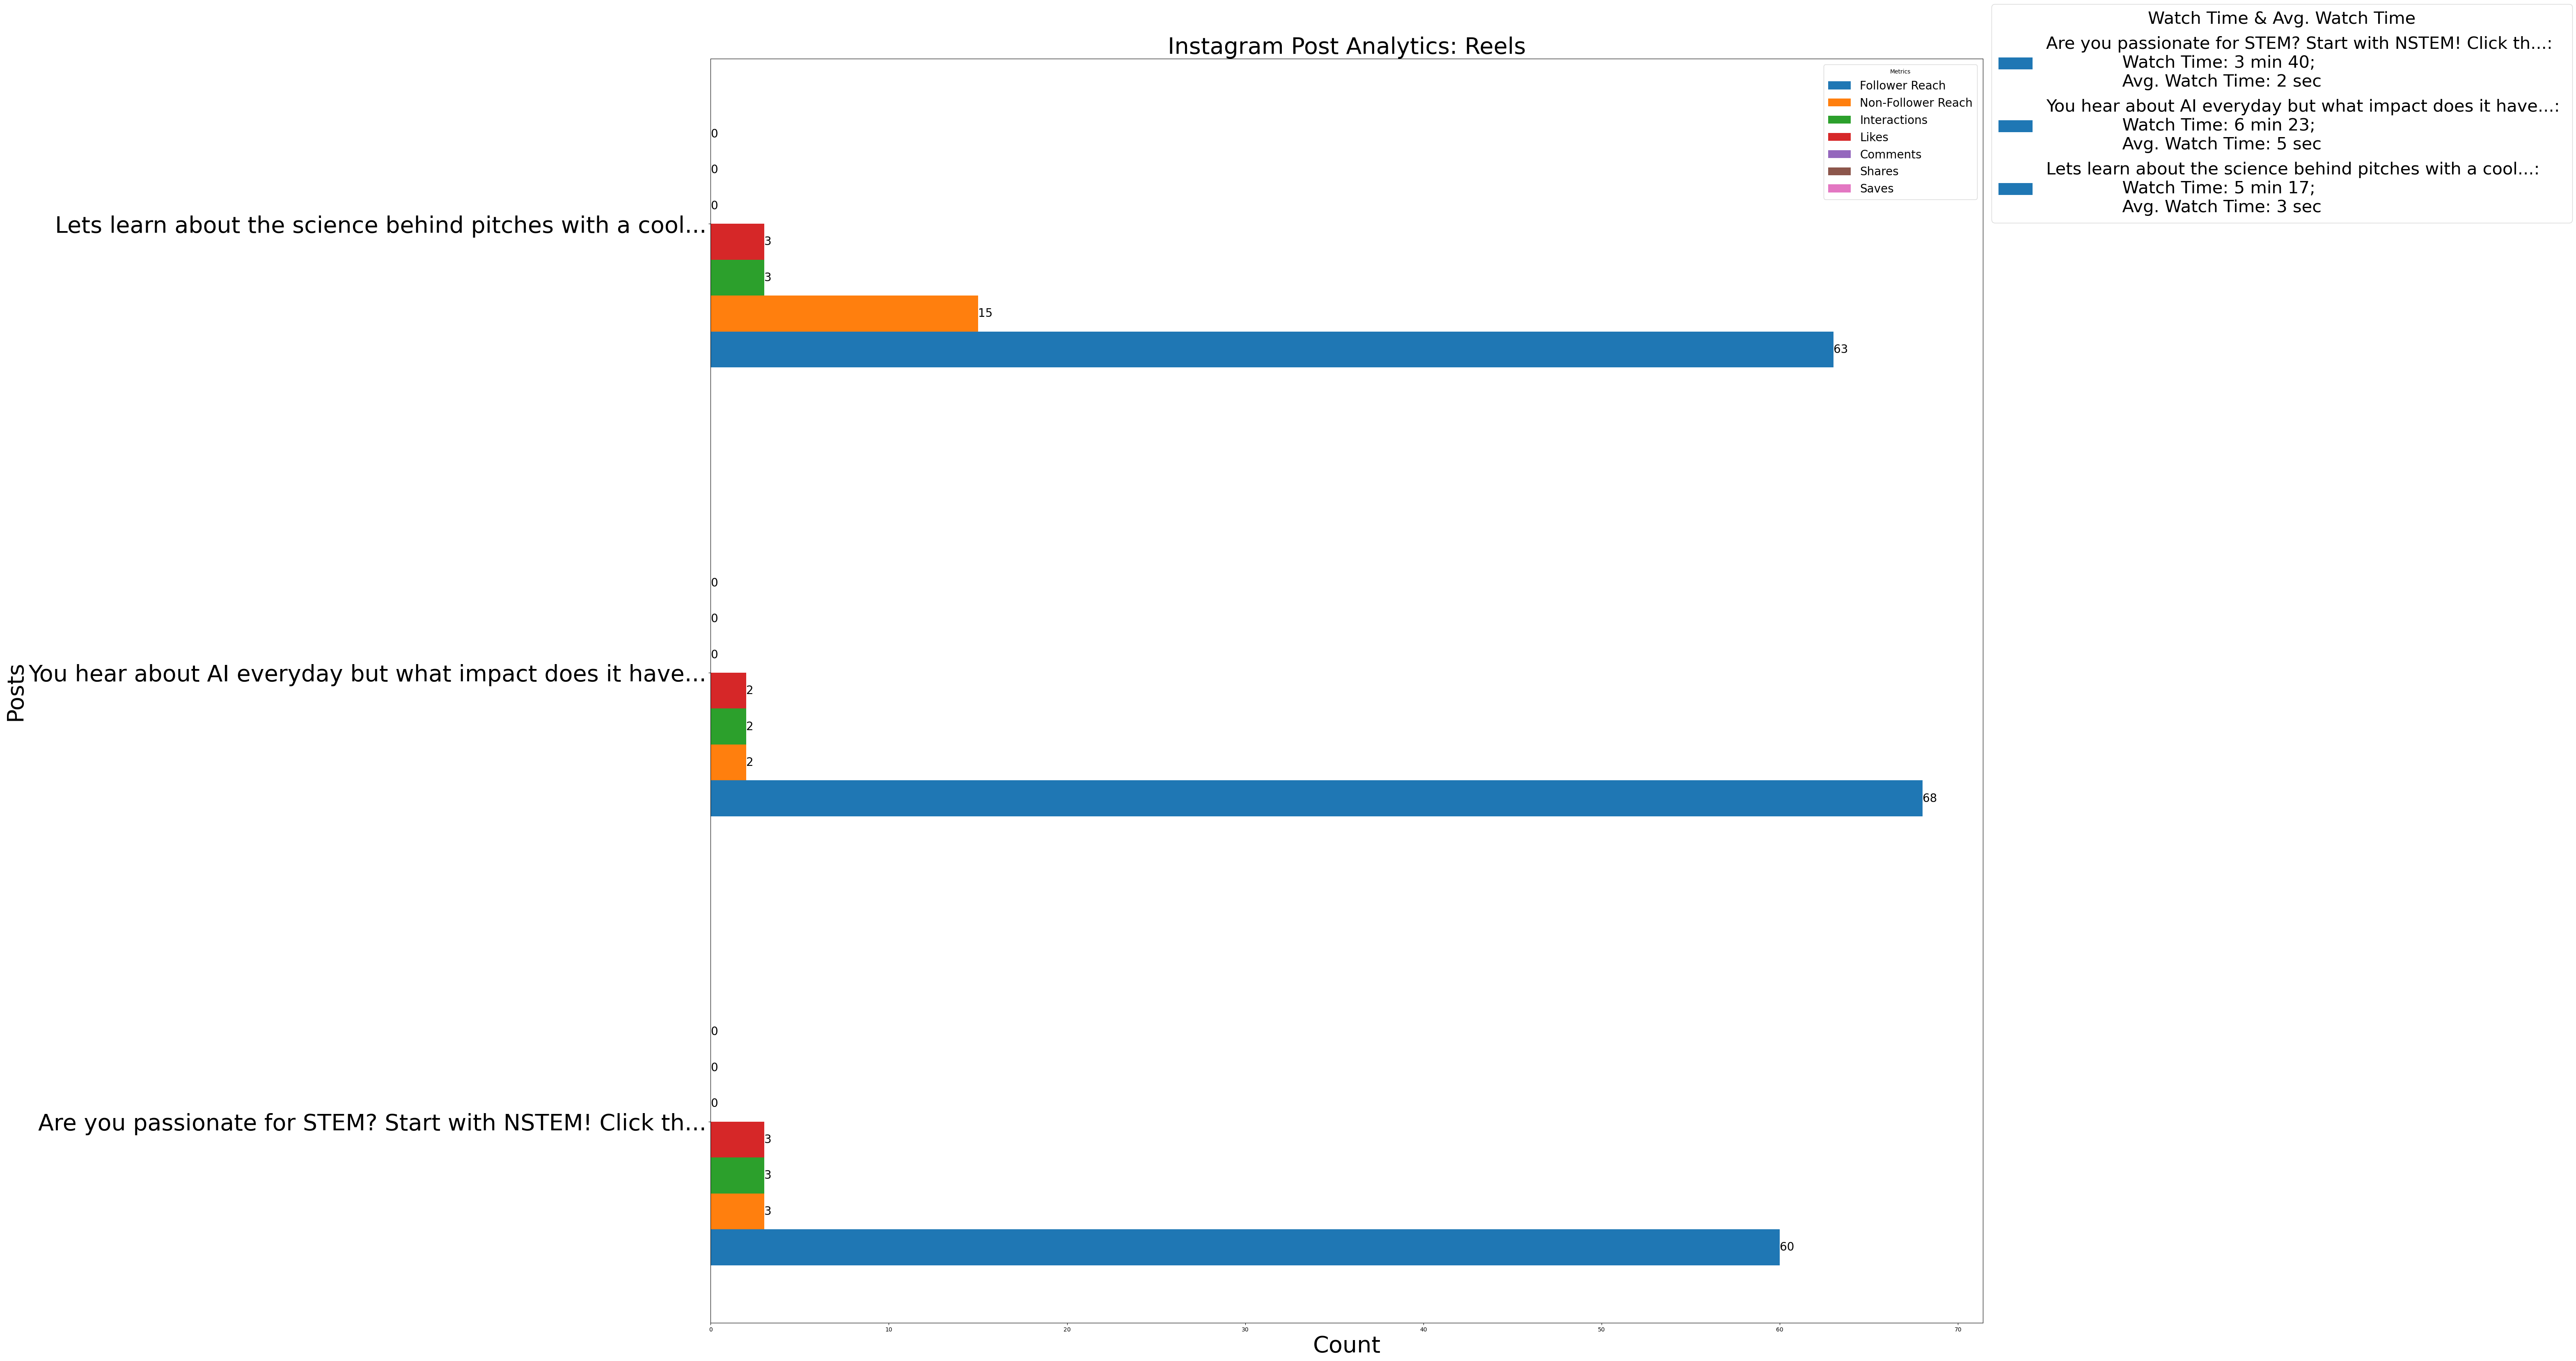

In [14]:
IG_plot_reel(df = df_ig.loc[df_ig["""Media Type (Video or Photo)"""]=="reel",])